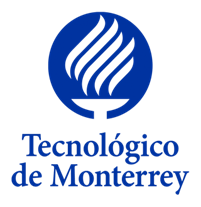

## Computer Vision (Gpo 10)

### Professors: 
* Dr. Gilberto Ochoa Ruiz
* Mtra. Yetnalezi Quintas Ruiz

### Students: 
* Armando Bringas Corpus - A01200230
* Guillermo Alfonso Muñiz Hermosillo - A01793101
* Jorge Luis Arroyo Chavelas - A01793023
* Samantha R Mancias Carrillo - A01196762
* Sofia E Mancias Carrillo - A01196563




# Image Segmentation - Watershed

## Table of Contents
1. [Libraries](#libraries)
2. [Implementation with skimage](#skimage)
    
    a. [Compact Watershed](#skimage_compactwatershed)
    
    b. [Morphological Watershed Algorithm](#skimage_morphologicalwatershed)

## Libraries <a class="anchor" id="libraries" ></a>

In [3]:
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import sobel
from skimage.segmentation import mark_boundaries,watershed
from skimage.io import imread

## Implementation with skimage <a class="anchor" id="skimage" ></a>

### Compact Watershed <a class="anchor" id="skimage_compactwatershed" ></a>

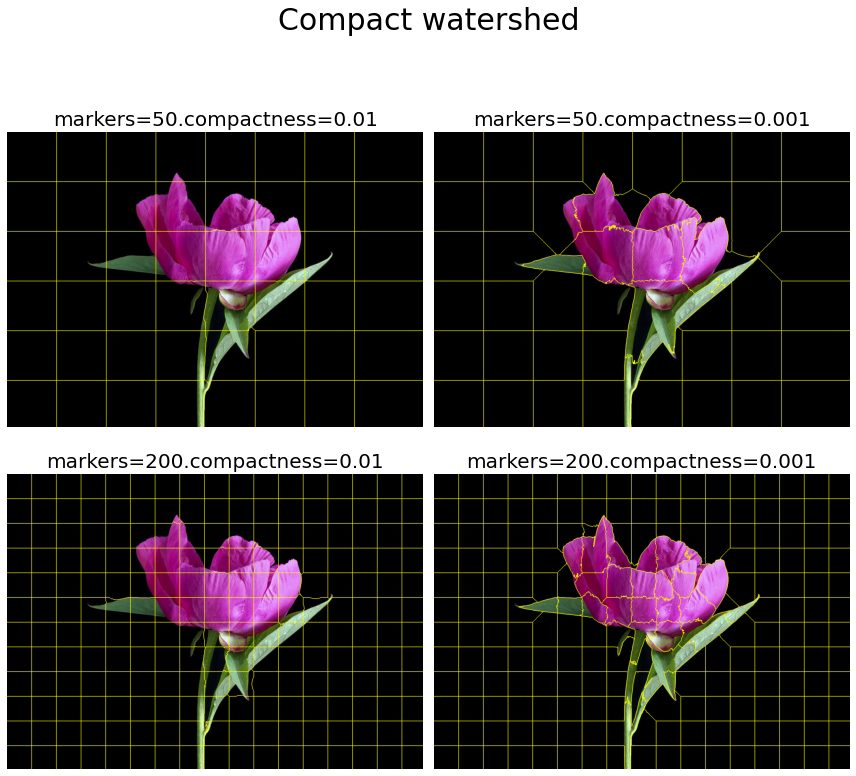

In [4]:
# Load image and select every other pixel in each dimension
img = imread('img/Peony-Rose-Flowers.jpg')[::2, ::2, :3]

# Compute gradient of image
gradient = sobel(rgb2gray(img))

# Set up plot
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
axs = axs.ravel()

# Setup parameters for Watershed algorithm
markers_list = [50, 50, 200, 200]
compactness_list = [0.01, 0.001, 0.01, 0.001]

# Apply watershed segmentation with different parameters and plot results
for i, (markers, compactness) in enumerate(zip(markers_list, compactness_list)):
    segments_watershed = watershed(gradient, markers=markers, compactness=compactness)
    axs[i].imshow(mark_boundaries(img, segments_watershed))
    axs[i].set_title(f"markers={markers}.compactness={compactness}", size=20)
    axs[i].axis('off')

plt.suptitle('Compact watershed', size=30)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Morphological Watershed Algorithm <a class="anchor" id="skimage_morphologicalwatershed" ></a>